# 1) Preparação do Ambiente


## 1.1) Instalação das Bibliotecas de Machine Learning:

  *   Catboost;
  *   XGBoost.

In [1]:
print('---***'*60)
print('---***'*60)
!pip install catboost
print('---***'*60)
print('---***'*60)
!pip install xgboost
print('---***'*60)
print('---***'*60)

---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***
---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.6 MB/s eta 0:00:00
---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***---***

## 1.2) Importação das Bibliotecas

          a)   Numpy;
          b)   Pandas;
          c)   Matplotlib;
          d)   Seaborn;
          e)   Catboost;
          f)   XGBoost;
          g)   KNeighbors.



In [2]:
# coding=utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from google.colab import files

pd.set_option('display.precision', 3)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1.3) Carga da Base Final para aplicação dos modelos de Machine Learning(Arquivo Excel)

Base contém os dados conjuntos de Arrecadação, PIB e Inadimplência
*   Carga do arquivo base_final_ml.xlsx para Dataframe base

In [3]:
arq_base = files.upload()
colunas = 'B:AG'

base = pd.read_excel(arq_base['base_final_ml.xlsx'], usecols=colunas)

Saving base_final_ml.xlsx to base_final_ml.xlsx


## 1.5) Estatística Descritiva dos Dados

*   Campos;
*   Tipos dos campos;
*   Atributos categóricos;
*   Descrição dos dados;

In [4]:
print('*' * 60)
print('Campos da Base Inadimplência, Arrecadação e PIB:')
print('*' * 60)
print('-' * 31)
print('Colunas          Tipo dos dados')
print('-' * 31)
print(base.dtypes)
print('*' * 100)
print('Descrição dos dados:')
print('-' * 73)
print(base.describe())
print('*' * 100)

************************************************************
Campos da Base Inadimplência, Arrecadação e PIB:
************************************************************
-------------------------------
Colunas          Tipo dos dados
-------------------------------
arrec_2020       float64
inad_2020        float64
Valor_ab_agro    float64
Valor_ab_publ    float64
PIB              float64
PIB_pc           float64
Est_AC             int64
Est_AL             int64
Est_AM             int64
Est_AP             int64
Est_BA             int64
Est_CE             int64
Est_DF             int64
Est_ES             int64
Est_MA             int64
Est_MG             int64
Est_MS             int64
Est_MT             int64
Est_PA             int64
Est_PB             int64
Est_PE             int64
Est_PI             int64
Est_PR             int64
Est_RJ             int64
Est_RN             int64
Est_RO             int64
Est_RR             int64
Est_RS             int64
Est_SC             int64
Est_SE  

# -----------------------------------------------------------------------------------------------------------

# 2) Bases de Treinamento e Teste e Definição do Baseline

O valor da média para a base_processamento da Inadimplência de 2020 ('inad_2020') ficou em 0,572.

Usaremos o método mean_absolute_error para calcular o Baseline ou valor de referência que será o MAE - Erro Absoluto Médio.


## 2.1) Divisão da base em:

*   Treinamento;
*   Teste.



In [5]:
X_aux = base [:]
X = X_aux.copy()
X.drop(columns=['inad_2020'], inplace=True)
y = base [['inad_2020']]

print('*' * 300)
print('Variáveis preditoras:')
print('-'* 21)
print(X)
print('*' * 300)
print('*' * 30)
print('Label:')
print('-' * 30)
print(y)
print('*' * 30)

************************************************************************************************************************************************************************************************************************************************************************************************************
Variáveis preditoras:
---------------------
      arrec_2020  Valor_ab_agro  Valor_ab_publ    PIB  PIB_pc  Est_AC  Est_AL  Est_AM  Est_AP  Est_BA  Est_CE  Est_DF  Est_ES  Est_MA  Est_MG  Est_MS  Est_MT  Est_PA  Est_PB  Est_PE  Est_PI  Est_PR  Est_RJ  Est_RN  Est_RO  Est_RR  Est_RS  Est_SC  Est_SE  Est_SP  Est_TO
0          4.804          7.883          8.027  8.481   4.291       1       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0
1          4.633          7.210          7.767  7.986   4.109       1       0       0       0       0       0      

In [6]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, random_state=0)

print('Base Treinamento:')
print(X_treinamento)
print('Rótulo Treinamento')
print(y_treinamento)
print('***' * 30)
print('Base Teste:')
print(X_teste)
print('Rótulo Teste')
print(y_teste)

Base Treinamento:
      arrec_2020  Valor_ab_agro  Valor_ab_publ    PIB  PIB_pc  Est_AC  Est_AL  Est_AM  Est_AP  Est_BA  Est_CE  Est_DF  Est_ES  Est_MA  Est_MG  Est_MS  Est_MT  Est_PA  Est_PB  Est_PE  Est_PI  Est_PR  Est_RJ  Est_RN  Est_RO  Est_RR  Est_RS  Est_SC  Est_SE  Est_SP  Est_TO
831        5.938          7.714          8.143  8.749   4.256       0       0       0       0       0       0       0       1       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0
1273       4.524          6.994          7.897  8.099   3.827       0       0       0       0       0       0       0       0       1       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0
3312       5.446          8.153          7.543  8.496   4.686       0       0       0       0       0       0       0       0       0       0       0       0       0       

## 2.2) Preparação da Baseline

In [7]:
print('*' * 60)
print('Comparativo das Médias da Inadimplência de 2020 das bases')
print('*' * 60)
print('-' * 30)
print('Base completa (y):')
print(y.mean()[0])
print('-' * 30)
print('Base de treinamento (y_treinamento):')
print(y_treinamento.mean()[0])
print('-' * 30)
print('Base de teste (y_teste):')
print(y_teste.mean()[0])
print('-' * 30)
vmr_base_compl = y.mean()[0]

# Criando ndarray replicando a média para o nº de linhas da base completa
y_pred = np.empty(len(y))
y_pred.fill(vmr_base_compl)

************************************************************
Comparativo das Médias da Inadimplência de 2020 das bases
************************************************************
------------------------------
Base completa (y):
0.5723302834940803
------------------------------
Base de treinamento (y_treinamento):
0.5727663068789987
------------------------------
Base de teste (y_teste):
0.5710225265745151
------------------------------


## 2.3) Cálculo da Baseline

In [8]:
def resultados (real, predicao, comparar):
    print(comparar)
    print('MAE: ', mean_absolute_error(real, predicao))

In [9]:
resultados(y, y_pred, 'Baseline')

Baseline
MAE:  0.0941239804494862


# 3) Aplicação dos Modelos de Machine Learning

## 3.1) Gráfico de dispersão da predição versus real

In [10]:
def graf_dispersao(real, predicao):
    plt.scatter(real, predicao)
    amplitude = [real.min(), predicao.max()]
    plt.plot(amplitude, amplitude, 'green')
    plt.xlabel('Inadimplência real de 2020')
    plt.ylabel('Inadimplência predita de 2020')
    plt.show()

## 3.2) Nearest Neighbors Regression

Nearest Neighbors Regression
MAE:  0.07044308234741914


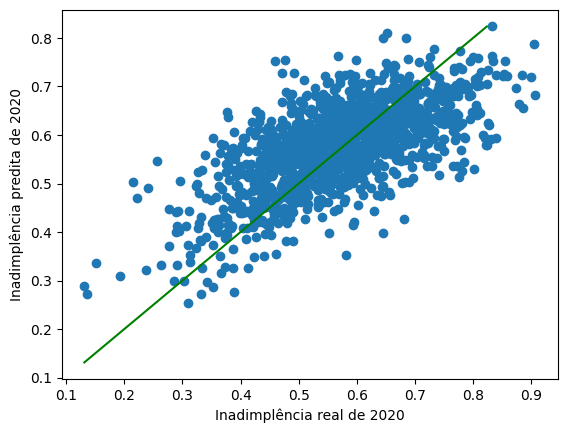

In [11]:
modelo_knn = KNeighborsRegressor()
modelo_knn.fit(X_treinamento, y_treinamento)

pred_knn = modelo_knn.predict(X_teste)

resultados(y_teste, pred_knn, 'Nearest Neighbors Regression')
label_real = y_teste.to_numpy()
graf_dispersao(label_real, pred_knn)

## 3.3) XGBoost

XGBoost
MAE:  0.06739876507702576


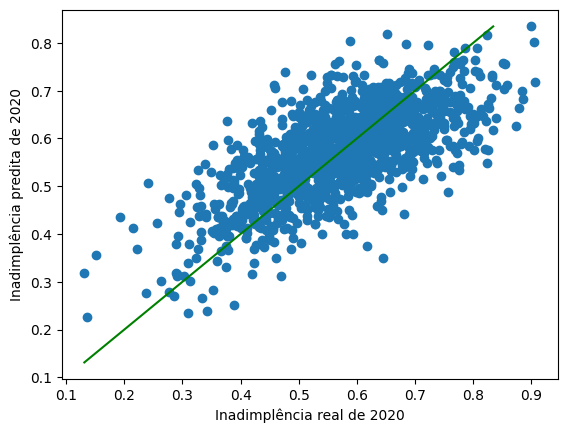

In [12]:
modelo_xgboost = XGBRegressor()
modelo_xgboost.fit(X_treinamento, y_treinamento)

pred_xgboost = modelo_xgboost.predict(X_teste)

resultados(y_teste, pred_xgboost, 'XGBoost')
lbl_real_xgb = y_teste.to_numpy()
graf_dispersao(lbl_real_xgb, pred_xgboost)

## 3.4) CatBoost

0:	learn: 0.0933100	total: 49.8ms	remaining: 49.7s
1:	learn: 0.0926446	total: 54.9ms	remaining: 27.4s
2:	learn: 0.0920175	total: 58.4ms	remaining: 19.4s
3:	learn: 0.0914107	total: 60.9ms	remaining: 15.2s
4:	learn: 0.0908367	total: 63.1ms	remaining: 12.5s
5:	learn: 0.0902504	total: 65.6ms	remaining: 10.9s
6:	learn: 0.0896933	total: 68.3ms	remaining: 9.69s
7:	learn: 0.0891423	total: 70.9ms	remaining: 8.79s
8:	learn: 0.0885725	total: 73.4ms	remaining: 8.08s
9:	learn: 0.0880823	total: 76.1ms	remaining: 7.54s
10:	learn: 0.0875503	total: 78.6ms	remaining: 7.06s
11:	learn: 0.0869808	total: 81.1ms	remaining: 6.68s
12:	learn: 0.0865665	total: 83.6ms	remaining: 6.35s
13:	learn: 0.0861153	total: 86.2ms	remaining: 6.07s
14:	learn: 0.0856750	total: 88.7ms	remaining: 5.83s
15:	learn: 0.0852414	total: 91.1ms	remaining: 5.6s
16:	learn: 0.0847645	total: 93.6ms	remaining: 5.41s
17:	learn: 0.0843896	total: 96.1ms	remaining: 5.24s
18:	learn: 0.0839445	total: 98.7ms	remaining: 5.09s
19:	learn: 0.0835363	to

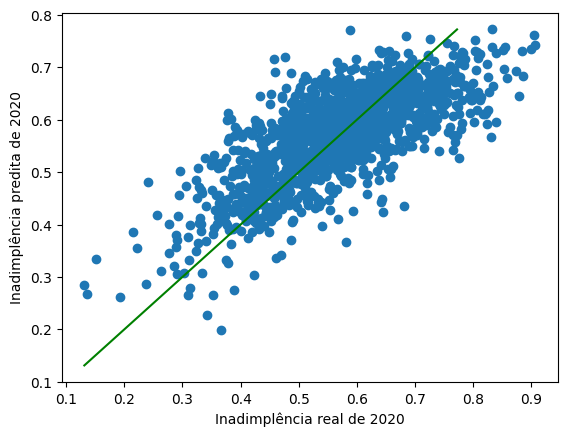

In [13]:
treinamento_pool = Pool(X_treinamento, y_treinamento)
teste_pool = Pool(X_teste, y_teste)

modelo_catboost = CatBoostRegressor(loss_function='MAE')
modelo_catboost.fit(treinamento_pool)

pred_catboost = modelo_catboost.predict(teste_pool)

resultados(y_teste, pred_catboost, 'Catboost')
lbl_real_cb = y_teste.to_numpy()
graf_dispersao(lbl_real_cb, pred_catboost)

# 4) Análise de Resíduos

## 4.1) Análise de Resíduos para o Modelo de Melhor Performance ==>> CatBoost

In [14]:
ar_pool = Pool(X, y)

ar_modelo_catboost = CatBoostRegressor(loss_function='MAE')
ar_modelo_catboost.fit(ar_pool)

ar_pred_catboost = ar_modelo_catboost.predict(ar_pool)

resultados(y, ar_pred_catboost, 'Catboost - Análise de Resíduos')


0:	learn: 0.0933718	total: 3.36ms	remaining: 3.36s
1:	learn: 0.0927418	total: 6.11ms	remaining: 3.05s
2:	learn: 0.0920517	total: 8.74ms	remaining: 2.9s
3:	learn: 0.0914218	total: 11.4ms	remaining: 2.83s
4:	learn: 0.0908312	total: 13.9ms	remaining: 2.77s
5:	learn: 0.0902504	total: 16.5ms	remaining: 2.73s
6:	learn: 0.0896901	total: 19.1ms	remaining: 2.71s
7:	learn: 0.0891828	total: 21.8ms	remaining: 2.7s
8:	learn: 0.0885753	total: 24.4ms	remaining: 2.69s
9:	learn: 0.0880765	total: 27.4ms	remaining: 2.71s
10:	learn: 0.0876159	total: 30ms	remaining: 2.7s
11:	learn: 0.0871627	total: 32.8ms	remaining: 2.7s
12:	learn: 0.0867098	total: 35.6ms	remaining: 2.7s
13:	learn: 0.0862405	total: 38.2ms	remaining: 2.69s
14:	learn: 0.0858069	total: 40.9ms	remaining: 2.68s
15:	learn: 0.0853887	total: 43.5ms	remaining: 2.68s
16:	learn: 0.0849287	total: 46.4ms	remaining: 2.68s
17:	learn: 0.0845631	total: 49.2ms	remaining: 2.68s
18:	learn: 0.0841133	total: 51.6ms	remaining: 2.66s
19:	learn: 0.0836843	total: 5

## 4.2) Gráfico da Inadimplência 2020

In [15]:
def plota_box (dados, coluna):
    sns.boxplot(data=dados[coluna], orient="v")
    plt.show()
    # dados.boxplot(column=coluna, figsize=(9,9))
    print('Índice  Valor')
    print(dados[coluna].nlargest(n=5))
    print(dados[coluna].agg(['min', 'max']))
    print(dados[coluna].describe())
    print('*' * 150)


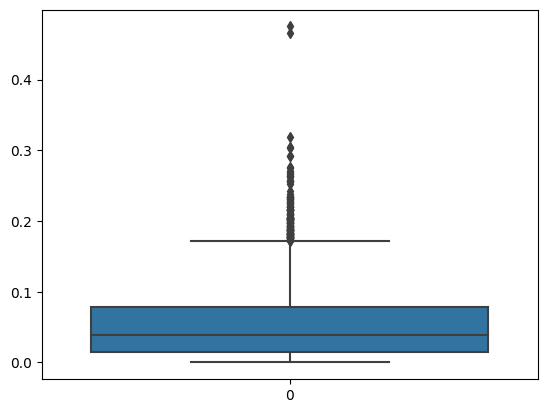

Índice  Valor
4061    0.475
1925    0.466
1252    0.318
3019    0.304
5130    0.303
Name: residuo, dtype: float64
min    4.097e-06
max    4.751e-01
Name: residuo, dtype: float64
count    5.567e+03
mean     5.271e-02
std      4.890e-02
min      4.097e-06
25%      1.475e-02
50%      3.937e-02
75%      7.779e-02
max      4.751e-01
Name: residuo, dtype: float64
******************************************************************************************************************************************************


In [16]:
X_auxiliar = X [:]
X_an_res = X_auxiliar.copy()

X_an_res['inad_predicao'] = ar_pred_catboost

X_an_res['residuo'] = abs(base['inad_2020'] - X_an_res['inad_predicao'])

# Boxplot e Histograma da análise de resíduos
plota_box(X_an_res,'residuo')



array([[<Axes: title={'center': 'residuo'}>]], dtype=object)

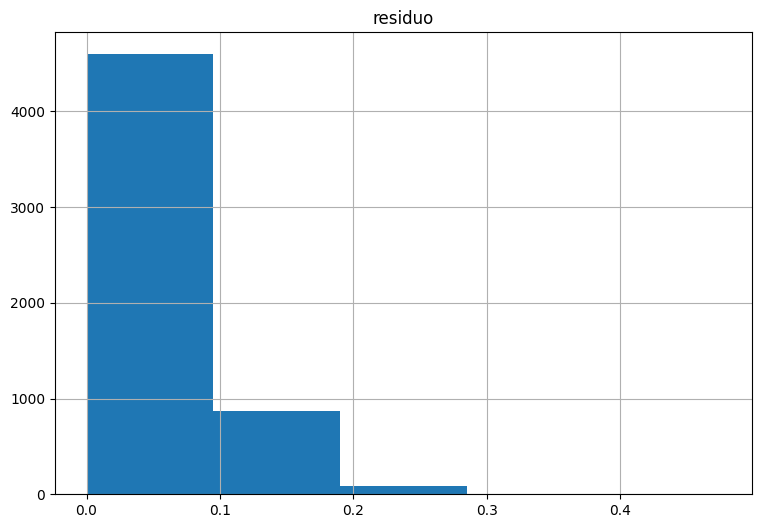

In [17]:
X_an_res.hist(column='residuo', figsize=(9,6), bins=5)

# 8) Hiperparâmetros e Cross Validation

In [18]:
modelo_cv = CatBoostRegressor(loss_function='MAE')

grid = {'max_depth': [3,4,5,6,7,8,9,10],'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]}

gscv = GridSearchCV (estimator = modelo_cv, param_grid = grid, scoring ='neg_mean_absolute_error', cv = 5)

gscv.fit(X, y)

print(gscv.best_estimator_)
print(gscv.best_score_)
print(gscv.best_params_)


A saída de streaming foi truncada nas últimas 5000 linhas.
503:	learn: 0.0466230	total: 10.4s	remaining: 12.4s
504:	learn: 0.0465883	total: 10.5s	remaining: 12.3s
505:	learn: 0.0465612	total: 10.5s	remaining: 12.3s
506:	learn: 0.0465188	total: 10.5s	remaining: 12.3s
507:	learn: 0.0464734	total: 10.5s	remaining: 12.3s
508:	learn: 0.0464339	total: 10.5s	remaining: 12.2s
509:	learn: 0.0464158	total: 10.6s	remaining: 12.2s
510:	learn: 0.0463887	total: 10.6s	remaining: 12.2s
511:	learn: 0.0463605	total: 10.6s	remaining: 12.2s
512:	learn: 0.0463437	total: 10.6s	remaining: 12.1s
513:	learn: 0.0463270	total: 10.6s	remaining: 12.1s
514:	learn: 0.0463099	total: 10.6s	remaining: 12.1s
515:	learn: 0.0462837	total: 10.7s	remaining: 12.1s
516:	learn: 0.0462616	total: 10.7s	remaining: 12s
517:	learn: 0.0462386	total: 10.7s	remaining: 12s
518:	learn: 0.0461840	total: 10.7s	remaining: 12s
519:	learn: 0.0461571	total: 10.7s	remaining: 12s
520:	learn: 0.0461150	total: 10.8s	remaining: 12s
521:	learn: 0.0

## 8.2) Aplicação do Cross Validation e Hiperparâmetros

In [19]:
cv_hp_pool = Pool(X, y)
modelo_cv_hp = CatBoostRegressor(loss_function='MAE', max_depth=7, n_estimators=1100)

modelo_cv_hp.fit(cv_hp_pool)

cv_hp_pred_catboost = modelo_cv_hp.predict(cv_hp_pool)

resultados(y, cv_hp_pred_catboost, 'Catboost - Grid Search CV e HP')



0:	learn: 0.0933215	total: 4.13ms	remaining: 4.54s
1:	learn: 0.0925933	total: 8.46ms	remaining: 4.65s
2:	learn: 0.0918186	total: 12.6ms	remaining: 4.59s
3:	learn: 0.0910554	total: 17.4ms	remaining: 4.77s
4:	learn: 0.0903516	total: 21.7ms	remaining: 4.74s
5:	learn: 0.0897623	total: 25.7ms	remaining: 4.69s
6:	learn: 0.0891387	total: 29.9ms	remaining: 4.67s
7:	learn: 0.0885005	total: 33.9ms	remaining: 4.62s
8:	learn: 0.0879093	total: 38.1ms	remaining: 4.62s
9:	learn: 0.0873738	total: 42.5ms	remaining: 4.63s
10:	learn: 0.0868555	total: 46.7ms	remaining: 4.62s
11:	learn: 0.0864001	total: 50.8ms	remaining: 4.61s
12:	learn: 0.0858543	total: 55.2ms	remaining: 4.61s
13:	learn: 0.0853332	total: 59.4ms	remaining: 4.61s
14:	learn: 0.0847774	total: 63.5ms	remaining: 4.59s
15:	learn: 0.0842973	total: 68.1ms	remaining: 4.61s
16:	learn: 0.0838914	total: 72.3ms	remaining: 4.6s
17:	learn: 0.0835216	total: 76.1ms	remaining: 4.58s
18:	learn: 0.0832053	total: 80.3ms	remaining: 4.57s
19:	learn: 0.0827620	to

In [20]:
modelo_cv_rs = CatBoostRegressor(loss_function='MAE')

param_dist = {'max_depth': [3,4,5,6,7,8,9,10],'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]}

rscv = RandomizedSearchCV(modelo_cv_rs, param_dist, scoring ='neg_mean_absolute_error', cv = 5)

rscv.fit(X, y)

print(rscv.best_estimator_)
print(rscv.best_score_)
print(rscv.best_params_)

A saída de streaming foi truncada nas últimas 5000 linhas.
503:	learn: 0.0601547	total: 2s	remaining: 2.36s
504:	learn: 0.0601373	total: 2s	remaining: 2.35s
505:	learn: 0.0601305	total: 2s	remaining: 2.35s
506:	learn: 0.0601091	total: 2s	remaining: 2.34s
507:	learn: 0.0601019	total: 2s	remaining: 2.33s
508:	learn: 0.0600898	total: 2.01s	remaining: 2.33s
509:	learn: 0.0600655	total: 2.01s	remaining: 2.32s
510:	learn: 0.0600489	total: 2.01s	remaining: 2.32s
511:	learn: 0.0600330	total: 2.01s	remaining: 2.31s
512:	learn: 0.0600208	total: 2.01s	remaining: 2.3s
513:	learn: 0.0600113	total: 2.02s	remaining: 2.3s
514:	learn: 0.0600011	total: 2.02s	remaining: 2.29s
515:	learn: 0.0599881	total: 2.02s	remaining: 2.29s
516:	learn: 0.0599720	total: 2.02s	remaining: 2.28s
517:	learn: 0.0599670	total: 2.02s	remaining: 2.27s
518:	learn: 0.0599609	total: 2.03s	remaining: 2.27s
519:	learn: 0.0599461	total: 2.03s	remaining: 2.26s
520:	learn: 0.0599340	total: 2.03s	remaining: 2.26s
521:	learn: 0.0599195	

In [21]:
rs_cv_hp_pool = Pool(X, y)
modelo_rs_cv_hp = CatBoostRegressor(loss_function='MAE', max_depth=10, n_estimators=500)

modelo_rs_cv_hp.fit(rs_cv_hp_pool)

rs_cv_hp_pred_catboost = modelo_rs_cv_hp.predict(rs_cv_hp_pool)

resultados(y, rs_cv_hp_pred_catboost, 'Catboost - Random Search - CV e HP')

0:	learn: 0.0931685	total: 18ms	remaining: 9s
1:	learn: 0.0922734	total: 34.7ms	remaining: 8.64s
2:	learn: 0.0913729	total: 51.6ms	remaining: 8.54s
3:	learn: 0.0905602	total: 68.4ms	remaining: 8.48s
4:	learn: 0.0897421	total: 84.4ms	remaining: 8.36s
5:	learn: 0.0890094	total: 100ms	remaining: 8.25s
6:	learn: 0.0882662	total: 117ms	remaining: 8.26s
7:	learn: 0.0875215	total: 139ms	remaining: 8.53s
8:	learn: 0.0867945	total: 155ms	remaining: 8.44s
9:	learn: 0.0862077	total: 171ms	remaining: 8.38s
10:	learn: 0.0855779	total: 193ms	remaining: 8.57s
11:	learn: 0.0849424	total: 222ms	remaining: 9.02s
12:	learn: 0.0843070	total: 239ms	remaining: 8.96s
13:	learn: 0.0837422	total: 261ms	remaining: 9.05s
14:	learn: 0.0832025	total: 277ms	remaining: 8.97s
15:	learn: 0.0826120	total: 296ms	remaining: 8.97s
16:	learn: 0.0820469	total: 314ms	remaining: 8.92s
17:	learn: 0.0815266	total: 330ms	remaining: 8.85s
18:	learn: 0.0810046	total: 347ms	remaining: 8.78s
19:	learn: 0.0804963	total: 364ms	remaini